# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Mario Bros Style

Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0Metal device set to: Apple M1 Pro



In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/WilmaFlinstones.jpeg")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 5000

2023-05-13 19:51:07.216882: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=3893.57
Iteration 200: loss=2869.76
Iteration 300: loss=2428.52
Iteration 400: loss=2173.53
Iteration 500: loss=2001.54
Iteration 600: loss=1878.19
Iteration 700: loss=1781.62
Iteration 800: loss=1704.97
Iteration 900: loss=1641.92
Iteration 1000: loss=1587.88
Iteration 1100: loss=1540.97
Iteration 1200: loss=1500.03
Iteration 1300: loss=1464.47
Iteration 1400: loss=1433.13
Iteration 1500: loss=1405.18
Iteration 1600: loss=1379.77
Iteration 1700: loss=1356.53
Iteration 1800: loss=1335.47
Iteration 1900: loss=1315.98
Iteration 2000: loss=1298.03
Iteration 2100: loss=1281.57
Iteration 2200: loss=1266.49
Iteration 2300: loss=1252.61
Iteration 2400: loss=1239.74
Iteration 2500: loss=1227.81
Iteration 2600: loss=1216.65
Iteration 2700: loss=1206.22
Iteration 2800: loss=1196.46
Iteration 2900: loss=1187.31
Iteration 3000: loss=1178.74
Iteration 3100: loss=1170.69
Iteration 3200: loss=1163.10
Iteration 3300: loss=1155.96
Iteration 3400: loss=1149.22
Iteration 3500: loss=11

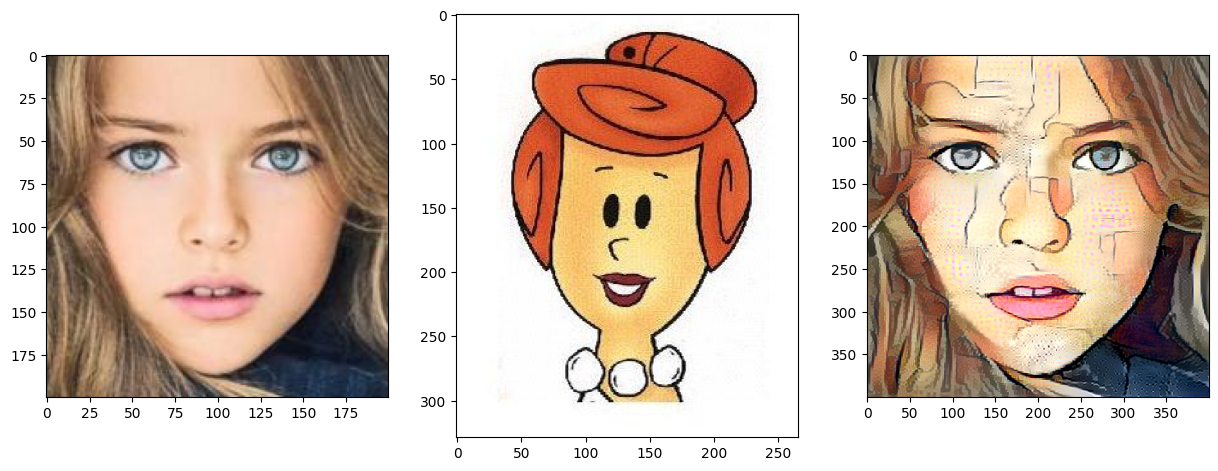

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/Flinstones/Wilma_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=764.63
Iteration 200: loss=547.46
Iteration 300: loss=457.60
Iteration 400: loss=408.51
Iteration 500: loss=376.48
Iteration 600: loss=353.43
Iteration 700: loss=335.93
Iteration 800: loss=322.01
Iteration 900: loss=310.60
Iteration 1000: loss=301.05
Iteration 1100: loss=292.93
Iteration 1200: loss=285.92
Iteration 1300: loss=279.81
Iteration 1400: loss=274.39
Iteration 1500: loss=269.57
Iteration 1600: loss=265.25
Iteration 1700: loss=261.35
Iteration 1800: loss=257.84
Iteration 1900: loss=254.64
Iteration 2000: loss=251.71
Iteration 2100: loss=249.04
Iteration 2200: loss=246.57
Iteration 2300: loss=244.29
Iteration 2400: loss=242.18
Iteration 2500: loss=240.22
Iteration 2600: loss=238.40
Iteration 2700: loss=236.71
Iteration 2800: loss=235.14
Iteration 2900: loss=233.67
Iteration 3000: loss=232.30
Iteration 3100: loss=231.02
Iteration 3200: loss=229.81
Iteration 3300: loss=228.69
Iteration 3400: loss=227.63
Iteration 3500: loss=226.63
Iteration 3600: loss=225.69
I

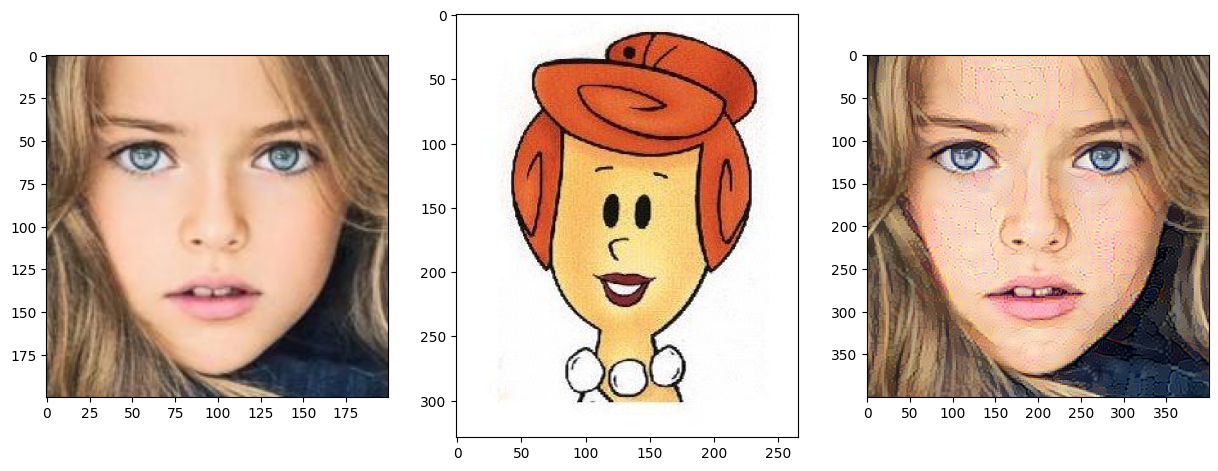

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/Flinstones/Wilma_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=4335.37
Iteration 200: loss=3295.97
Iteration 300: loss=2857.26
Iteration 400: loss=2599.79
Iteration 500: loss=2428.01
Iteration 600: loss=2304.76
Iteration 700: loss=2208.89
Iteration 800: loss=2130.94
Iteration 900: loss=2066.49
Iteration 1000: loss=2012.58
Iteration 1100: loss=1966.19
Iteration 1200: loss=1925.61
Iteration 1300: loss=1889.53
Iteration 1400: loss=1857.40
Iteration 1500: loss=1828.69
Iteration 1600: loss=1802.79
Iteration 1700: loss=1778.92
Iteration 1800: loss=1756.48
Iteration 1900: loss=1736.44
Iteration 2000: loss=1718.32
Iteration 2100: loss=1701.63
Iteration 2200: loss=1686.13
Iteration 2300: loss=1671.77
Iteration 2400: loss=1658.41
Iteration 2500: loss=1646.01
Iteration 2600: loss=1634.43
Iteration 2700: loss=1623.58
Iteration 2800: loss=1613.44
Iteration 2900: loss=1603.98
Iteration 3000: loss=1595.10
Iteration 3100: loss=1586.77
Iteration 3200: loss=1578.90
Iteration 3300: loss=1571.44
Iteration 3400: loss=1564.42
Iteration 3500: loss=15

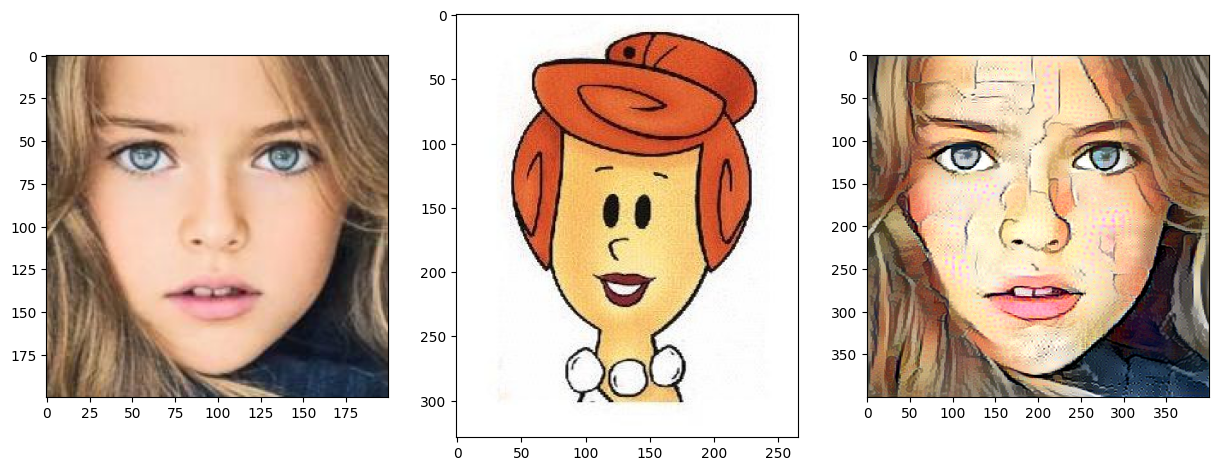

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/Flinstones/Wilma_E3.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=598.07
Iteration 200: loss=402.99
Iteration 300: loss=332.18
Iteration 400: loss=293.61
Iteration 500: loss=268.32
Iteration 600: loss=250.00
Iteration 700: loss=235.95
Iteration 800: loss=224.70
Iteration 900: loss=215.42
Iteration 1000: loss=207.63
Iteration 1100: loss=200.94
Iteration 1200: loss=195.11
Iteration 1300: loss=190.01
Iteration 1400: loss=185.49
Iteration 1500: loss=181.48
Iteration 1600: loss=177.89
Iteration 1700: loss=174.64
Iteration 1800: loss=171.69
Iteration 1900: loss=169.02
Iteration 2000: loss=166.57
Iteration 2100: loss=164.33
Iteration 2200: loss=162.27
Iteration 2300: loss=160.37
Iteration 2400: loss=158.61
Iteration 2500: loss=156.98
Iteration 2600: loss=155.46
Iteration 2700: loss=154.05
Iteration 2800: loss=152.73
Iteration 2900: loss=151.50
Iteration 3000: loss=150.34
Iteration 3100: loss=149.26
Iteration 3200: loss=148.24
Iteration 3300: loss=147.29
Iteration 3400: loss=146.39
Iteration 3500: loss=145.54
Iteration 3600: loss=144.74
I

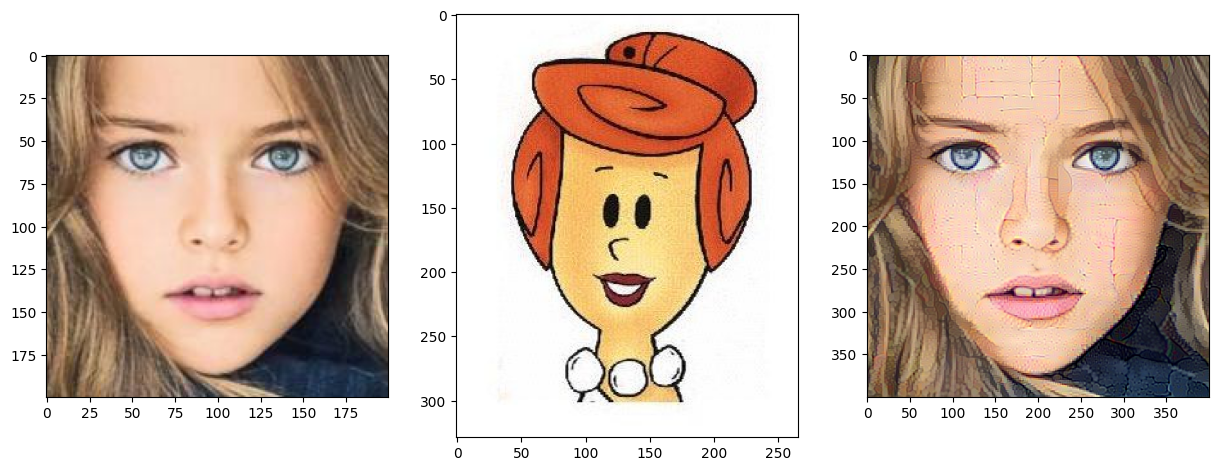

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/Flinstones/Wilma_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=1600.72
Iteration 200: loss=1172.02
Iteration 300: loss=977.60
Iteration 400: loss=861.85
Iteration 500: loss=783.12
Iteration 600: loss=725.07
Iteration 700: loss=680.39
Iteration 800: loss=645.23
Iteration 900: loss=616.84
Iteration 1000: loss=593.51
Iteration 1100: loss=573.85
Iteration 1200: loss=556.97
Iteration 1300: loss=542.32
Iteration 1400: loss=529.48
Iteration 1500: loss=518.15
Iteration 1600: loss=508.10
Iteration 1700: loss=499.09
Iteration 1800: loss=490.95
Iteration 1900: loss=483.57
Iteration 2000: loss=476.85
Iteration 2100: loss=470.74
Iteration 2200: loss=465.13
Iteration 2300: loss=459.97
Iteration 2400: loss=455.20
Iteration 2500: loss=450.81
Iteration 2600: loss=446.74
Iteration 2700: loss=442.95
Iteration 2800: loss=439.42
Iteration 2900: loss=436.11
Iteration 3000: loss=433.01
Iteration 3100: loss=430.11
Iteration 3200: loss=427.39
Iteration 3300: loss=424.85
Iteration 3400: loss=422.45
Iteration 3500: loss=420.20
Iteration 3600: loss=418.08

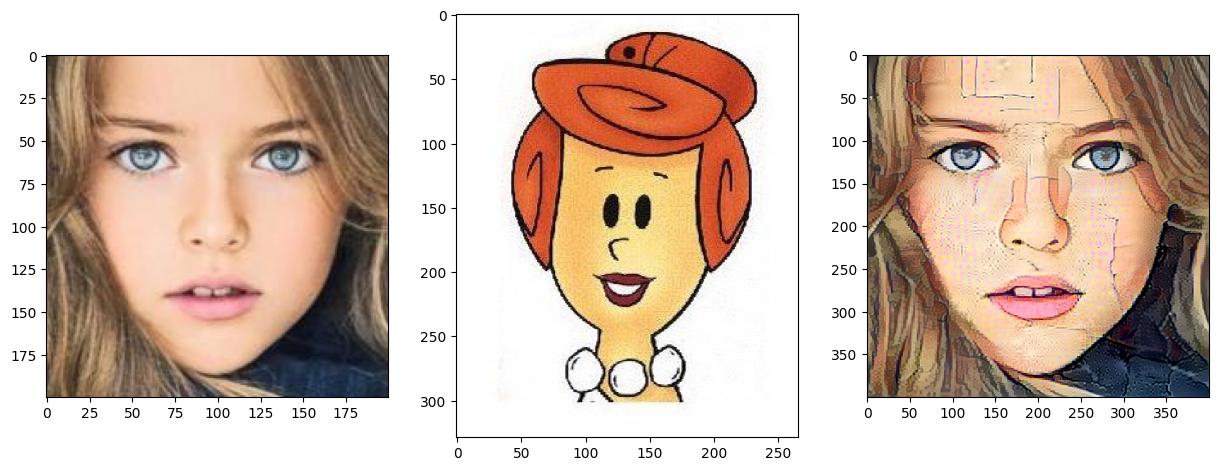

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/Flinstones/Wilma_E5.png")
style_weight = 2e-7
content_weight = 1e-10

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()